<a href="https://colab.research.google.com/github/ktripa/HydroThink/blob/main/Statistics/Understanding_Bootstrapping_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bootstrapping** is a powerful statistical method used for estimating the sampling distribution of a statistic by resampling with replacement from the original dataset. It allows you to estimate properties (like mean, variance, confidence intervals, etc.) of an estimator without making strong parametric assumptions about the data.

## Why Use Bootstrapping?
1. No need for normality assumptions: It is non-parametric, so it works well even if the data doesn’t follow a known distribution.
2. Small sample sizes: It can provide robust estimates even with limited data.
3. Complex estimators: It works for any statistic (median, percentiles, regression coefficients) for which traditional inference is difficult.

## How Bootstrapping Works?
1. Start with an observed dataset of size n.
2. Generate a large number (B) of bootstrap samples by sampling with replacement from the dataset.
3. Compute the statistic of interest (e.g., mean, variance) for each bootstrap sample.
4. Use the distribution of the statistic from the bootstrap samples to estimate its properties (e.g., confidence intervals).

# Example: Bootstrapping in Python
Let’s illustrate bootstrapping with an example: estimating the mean and its confidence interval.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Original dataset
np.random.seed(42)
data = np.random.randn(10000)  # 10000 random samples from a normal distribution

print(f"shape of data{data.shape}")
print(f"data{data}")

shape of data(10000,)
data[ 0.49671415 -0.1382643   0.64768854 ... -0.70531672  0.49576557
  0.64438845]


In [3]:
# Function to perform bootstrapping
def bootstrap(data, statistic, n_bootstrap=1000):
    bootstrap_samples = []
    for _ in range(n_bootstrap):
        # Sample with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        # Compute the statistic
        bootstrap_samples.append(statistic(sample))
    return np.array(bootstrap_samples)

# Bootstrap the mean
n_bootstrap = 1000
bootstrap_means = bootstrap(data, np.mean, n_bootstrap=n_bootstrap)

# Confidence intervals
alpha = 0.05
lower_bound = np.percentile(bootstrap_means, 100 * (alpha / 2))
upper_bound = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))

print(f"Bootstrap mean estimate: {np.mean(bootstrap_means):.2f}")
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")



Bootstrap mean estimate: -0.00
95% Confidence Interval: [-0.02, 0.02]


**Create a Figure**

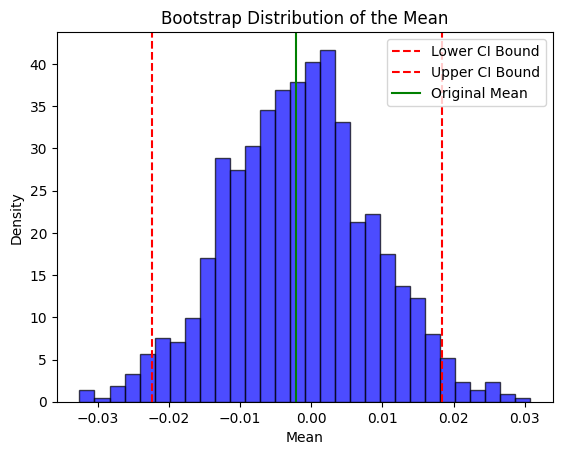

In [4]:
# Plotting
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue', edgecolor='k', density=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower CI Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper CI Bound')
plt.axvline(np.mean(data), color='green', linestyle='-', label='Original Mean')
plt.title('Bootstrap Distribution of the Mean')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()